# Step1: Install the environment and download data

## Install gym

In [36]:
!pip install -U gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import necessrary libraries

In [37]:
import json
import datetime as dt
import pandas as pd
import math
import os
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
from typing import Deque, Dict, List, Tuple

import gym
from gym import spaces

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn.utils import clip_grad_norm_

from IPython.display import clear_output

np.set_printoptions(suppress=True)


## Download finacial data

In [38]:
import yfinance as yf

#start and end date of the data. Can be changed freely.
startDate = "2006-01-01"
endDate = "2022-12-31"

#Load SPY historical data
SPY = yf.download('SPY', start=startDate, end=endDate)
SPY.to_csv('SPY')
SPY= SPY.sort_values('Date')

#load MSFT historical data
MSFT= yf.download('MSFT', start=startDate, end=endDate)
MSFT.to_csv('MSFT')
MSFT= MSFT.sort_values('Date')

#load AMC historical data
AMC= yf.download('AMC', start=startDate, end=endDate)
AMC.to_csv('AMC')
AMC= AMC.sort_values('Date')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Step2: Calculate the profit and show some examples of the financial data

## microsoft (msft, df1)

            Date        Open        High         Low       Close   Adj Close  \
0     2006-01-03   26.250000   27.000000   26.100000   26.840000   19.114637   
1     2006-01-04   26.770000   27.080000   26.770000   26.969999   19.207220   
2     2006-01-05   26.959999   27.129999   26.910000   26.990000   19.221462   
3     2006-01-06   26.889999   27.000000   26.490000   26.910000   19.164482   
4     2006-01-09   26.930000   27.070000   26.760000   26.860001   19.128885   
...          ...         ...         ...         ...         ...         ...   
4274  2022-12-23  236.110001  238.869995  233.940002  238.729996  238.133545   
4275  2022-12-27  238.699997  238.929993  235.830002  236.960007  236.367981   
4276  2022-12-28  236.889999  239.720001  234.169998  234.529999  233.944031   
4277  2022-12-29  235.649994  241.919998  235.649994  241.009995  240.407837   
4278  2022-12-30  238.210007  239.960007  236.660004  239.820007  239.220825   

         Volume    profit  
0      7997

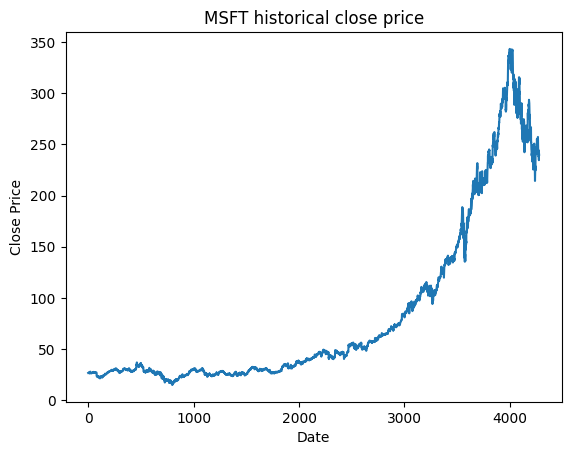

In [39]:
msft = pd.read_csv('MSFT')
msft = msft.sort_values('Date')

for i in range(len(msft)-1):
    msft.loc[i,"profit"] = msft.loc[i+1,'Close']- msft.loc[i,'Open']
    
plt.plot(msft['Close'])
# adding title/year the plot
plt.title('MSFT historical close price')
plt.xlabel('Date')
plt.ylabel('Close Price')
print(msft)

#######################the df1 below is just the msft here so I deleted them!!!!!
df1 = msft

## amc (df2)

            Date       Open       High        Low      Close  Adj Close  \
0     2013-12-18  19.180000  19.790001  18.900000  18.900000  13.593410   
1     2013-12-19  18.900000  19.490000  18.809999  19.490000  14.017756   
2     2013-12-20  19.650000  19.770000  19.400000  19.680000  14.154408   
3     2013-12-23  19.790001  19.990000  19.500000  19.740000  14.197564   
4     2013-12-24  19.740000  19.820000  19.500000  19.530001  14.046520   
...          ...        ...        ...        ...        ...        ...   
2270  2022-12-23   4.700000   4.820000   4.310000   4.400000   4.400000   
2271  2022-12-27   4.200000   4.210000   4.000000   4.030000   4.030000   
2272  2022-12-28   4.010000   4.130000   3.810000   3.840000   3.840000   
2273  2022-12-29   3.900000   4.190000   3.860000   4.140000   4.140000   
2274  2022-12-30   4.040000   4.090000   3.900000   4.070000   4.070000   

        Volume    profit  
0      5457200  0.309999  
1      1605400  0.780001  
2       737100  0.

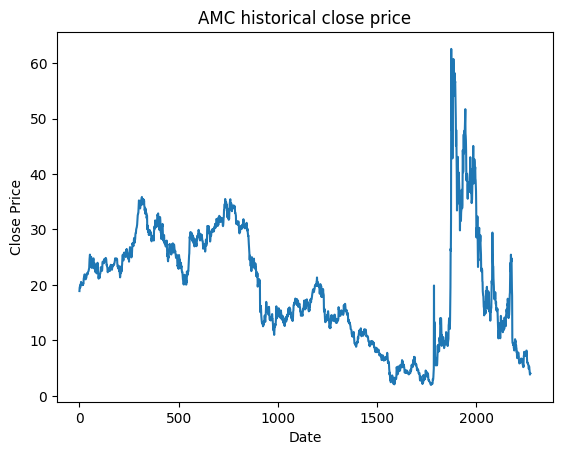

In [40]:
amc = pd.read_csv('AMC')
amc = amc.sort_values('Date')

for i in range(len(amc)-1):
    amc.loc[i,"profit"] = amc.loc[i+1,'Close']- amc.loc[i,'Open']
    
plt.plot(amc['Close'])
# adding title/year the plot
plt.title('AMC historical close price')
plt.xlabel('Date')
plt.ylabel('Close Price')
print(amc)
#######################the df below is just the amc here so I deleted them!!!!!
df2 = amc

## spy (df)

            Date        Open        High         Low       Close   Adj Close  \
0     2006-01-03  125.190002  127.000000  124.389999  126.699997   90.641731   
1     2006-01-04  126.860001  127.489998  126.699997  127.300003   91.070976   
2     2006-01-05  127.150002  127.589996  126.879997  127.379997   91.128151   
3     2006-01-06  128.020004  128.580002  127.360001  128.440002   91.886520   
4     2006-01-09  128.419998  129.059998  128.380005  128.770004   92.122597   
...          ...         ...         ...         ...         ...         ...   
4274  2022-12-23  379.649994  383.059998  378.029999  382.910004  381.454193   
4275  2022-12-27  382.790009  383.149994  379.649994  381.399994  379.949921   
4276  2022-12-28  381.329987  383.390015  376.420013  376.660004  375.227936   
4277  2022-12-29  379.630005  384.350006  379.079987  383.440002  381.982178   
4278  2022-12-30  380.640015  382.579987  378.429993  382.429993  380.975983   

        Volume    profit  
0     732567

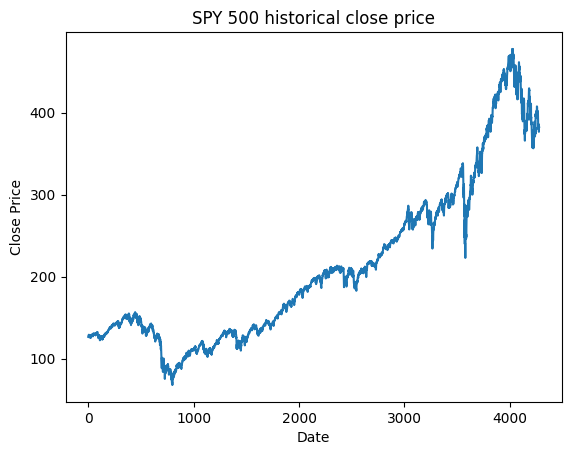

In [41]:
spy = pd.read_csv('SPY')
spy = spy.sort_values('Date')

for i in range(len(spy)-1):
    spy.loc[i,"profit"] = spy.loc[i+1,'Close']- spy.loc[i,'Open']
    
plt.plot(spy['Close'])
# adding title/year the plot
plt.title('SPY 500 historical close price')
plt.xlabel('Date')
plt.ylabel('Close Price')
print(spy)

# Step3: Stock trading environment

In [80]:
https://github.com/notadamking/Stock-Trading-Environment

MAX_ACCOUNT_BALANCE = 2000000
MAX_NUM_SHARES = 2000000
MAX_SHARE_PRICE = 4900
MAX_OPEN_POSITIONS = 4
MAX_STEPS = 2000
INITIAL_ACCOUNT_BALANCE = 2000

class StockTradingEnv(gym.Env):
    """A stock trading environment for OpenAI gym"""
    metadata = {'render.modes': ['human']}
    def __init__(self, df):
        super(StockTradingEnv, self).__init__()
        self.df = df
        self.reward_range = (0, MAX_ACCOUNT_BALANCE)
# We have 3 actions, corresponding to "buy", "sell", "hold"
        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.Box(low=0, high=1, shape=(11,), dtype=np.float16)

    def _next_observation(self):
        obs = np.array([
            self.df.loc[self.current_step, 'Open'] / MAX_SHARE_PRICE,
            self.df.loc[self.current_step, 'High'] / MAX_SHARE_PRICE,
            self.df.loc[self.current_step, 'Low']/ MAX_SHARE_PRICE,
            self.df.loc[self.current_step, 'Close']/ MAX_SHARE_PRICE,
            self.df.loc[self.current_step, 'Volume']/ MAX_NUM_SHARES,
            self.balance / MAX_ACCOUNT_BALANCE,
            self.shares_held / MAX_NUM_SHARES,
            self.cost_basis / MAX_SHARE_PRICE,
            self.total_shares_sold / MAX_NUM_SHARES,
            self.total_sales_value / (MAX_NUM_SHARES * MAX_SHARE_PRICE),
            self.profit / MAX_ACCOUNT_BALANCE], dtype=np.float16)
        return obs

    def _take_action(self, action):
        current_price = random.uniform(
            self.df.loc[self.current_step, "Open"], self.df.loc[self.current_step, "Close"])
        action_type = action
        amount = 1

        if action_type < 1:
            total_possible = int(self.balance / current_price)
            shares_bought = int(total_possible * amount)
            prev_cost = self.cost_basis * self.shares_held
            additional_cost = shares_bought * current_price
            self.balance -= additional_cost
            self.cost_basis = (prev_cost + additional_cost) / (self.shares_held + shares_bought)
            self.shares_held += shares_bought
        elif action_type < 2:
            shares_sold = int(self.shares_held * amount)
            self.balance += shares_sold * current_price
            self.shares_held -= shares_sold
            self.total_shares_sold += shares_sold
            self.total_sales_value += shares_sold * current_price

        self.net_worth = self.balance + self.shares_held * current_price

        if self.net_worth > self.max_net_worth:
            self.max_net_worth = self.net_worth

        if self.shares_held == 0:
            self.cost_basis = 0

    def step(self, action):
        self._take_action(action)

        self.current_step += 1

        if self.current_step > len(self.df.loc[:, 'Open'].values) - 6:
            self.current_step = 0

        delay_modifier = (self.current_step / MAX_STEPS)

        obs = self._next_observation()
        self.profit = self.net_worth - INITIAL_ACCOUNT_BALANCE
        self.max_net_worth = self.max_net_worth
        done = self.net_worth <= 0.5 * INITIAL_ACCOUNT_BALANCE
        reward = self.profit * delay_modifier

        return obs, reward, done, {}


    def reset(self):
        # Reset the state of the environment to an initial state

        self.balance = INITIAL_ACCOUNT_BALANCE
        self.net_worth = INITIAL_ACCOUNT_BALANCE
        self.max_net_worth = INITIAL_ACCOUNT_BALANCE
        self.shares_held = 0
        self.cost_basis = 0
        self.total_shares_sold = 0
        self.total_sales_value = 0
        self.profit = 0

       # Set the current step to a random point within the data frame

        self.current_step = random.randint(0, len(self.df.loc[:, 'Open'].values) - 6)
        return self._next_observation()

    def render(self, mode='human', close=False):
        # Render the environment to the screen

        profit = self.profit #self.net_worth - INITIAL_ACCOUNT_BALANCE
        max_net_worth= self.max_net_worth
        current_step=self.current_step
        current_balance=self.balance
        shares_held = self.shares_held
        total_shares_sold=self.total_shares_sold
        cost_basis=self.cost_basis
        total_sales_value=self.total_sales_value
        net_worth=self.net_worth
        #print(f'Step: {self.current_step}')
        #print(f'Balance: {self.balance}')
        #print(f'Shares held: {self.shares_held} (Total sold: {self.total_shares_sold})')
        #print(f'Avg cost for held shares: {self.cost_basis} (Total sales value: {self.total_sales_value})')
        #print(f'Net worth: {self.net_worth} (Max net worth: {self.max_net_worth})')
        #print(f'Profit: {profit}')

        episode_output=[profit, max_net_worth,current_step,current_balance,shares_held,total_shares_sold]
        return episode_output

# Step4: Replay Buffer

In [45]:
https://github.com/notadamking/Stock-Trading-Environment

class ReplayBuffer:
    """A simple numpy replay buffer."""

    def __init__(self, obs_dim: int, size: int, batch_size: int = 32):
        self.obs_buf = np.zeros([size, obs_dim], dtype=np.float32)
        self.next_obs_buf = np.zeros([size, obs_dim], dtype=np.float32)
        self.acts_buf = np.zeros([size], dtype=np.float32)
        self.rews_buf = np.zeros([size], dtype=np.float32)
        self.done_buf = np.zeros(size, dtype=np.float32)
        self.max_size, self.batch_size = size, batch_size
        self.ptr, self.size, = 0, 0

    def store(
        self,
        obs: np.ndarray,
        act: np.ndarray, 
        rew: float, 
        next_obs: np.ndarray, 
        done: bool,
    ):
        self.obs_buf[self.ptr] = obs
        self.next_obs_buf[self.ptr] = next_obs
        self.acts_buf[self.ptr] = act
        self.rews_buf[self.ptr] = rew
        self.done_buf[self.ptr] = done
        self.ptr = (self.ptr + 1) % self.max_size
        self.size = min(self.size + 1, self.max_size)

    def sample_batch(self) -> Dict[str, np.ndarray]:
        idxs = np.random.choice(self.size, size=self.batch_size, replace=False)
        return dict(obs=self.obs_buf[idxs],
                    next_obs=self.next_obs_buf[idxs],
                    acts=self.acts_buf[idxs],
                    rews=self.rews_buf[idxs],
                    done=self.done_buf[idxs])

    def __len__(self) -> int:
        return self.size

# Step5: Define Network classes

## Vanilla network (class DQNNetwork)
https://colab.research.google.com/github/Curt-Park/rainbow-is-all-you-need/blob/master/01.dqn.ipynb

In [46]:
class DQNNetwork(nn.Module):
    def __init__(self, obs_dim: int, action_dim: int):
        """Initialization."""
        super(DQNNetwork, self).__init__()

        self.layers = nn.Sequential(
            nn.Linear(obs_dim, 128), 
            nn.ReLU(),
            nn.Linear(128, 128), 
            nn.ReLU(), 
            nn.Linear(128, action_dim)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Forward method implementation."""
        return self.layers(x)

## Dueling Network (class Network_Dueling)
https://colab.research.google.com/github/Curt-Park/rainbow-is-all-you-need/blob/master/04.dueling.ipynb

In [47]:
class Network_Dueling(nn.Module):
    def __init__(self, in_dim: int, out_dim: int):
        """Initialization."""
        super(Network_Dueling, self).__init__()
        self.feature_layer = nn.Sequential(nn.Linear(in_dim, 128), nn.ReLU())

        # set advantage layer for dueling
        self.advantage_layer = nn.Sequential(nn.Linear(128, 128), nn.ReLU(), nn.Linear(128, out_dim))

        # set value layer for dueling
        self.value_layer = nn.Sequential(nn.Linear(128, 128), nn.ReLU(), nn.Linear(128, 1))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Do forward for q"""
        feature = self.feature_layer(x)

        value = self.value_layer(feature)
        advantage = self.advantage_layer(feature)
        q = value + advantage - advantage.mean(dim=-1, keepdim=True)

        return q


#Step6: Define Agent Classes

## Vanilla Agent (class DQNAgent)
https://colab.research.google.com/github/Curt-Park/rainbow-is-all-you-need/blob/master/01.dqn.ipynb

In [83]:
class DQNAgent:
    """DQN Agent interacting with environment.
    
    Attribute:
        env (gym.Env): openAI Gym environment
        memory (ReplayBuffer): replay memory to store transitions
        batch_size (int): batch size for sampling
        epsilon (float): parameter for epsilon greedy policy
        epsilon_decay (float): step size to decrease epsilon
        max_epsilon (float): max value of epsilon
        min_epsilon (float): min value of epsilon
        target_update (int): period for target model's hard update
        gamma (float): discount factor
        dqn (Network): model to train and select actions
        dqn_target (Network): target model to update
        optimizer (torch.optim): optimizer for training dqn
        transition (list): transition information including
                           state, action, reward, next_state, done
    """

    def __init__(
        self, 
        env: gym.Env,
        memory_size: int,
        batch_size: int,
        target_update: int,
        epsilon_decay: float,
        max_epsilon: float = 1.0,
        min_epsilon: float = 0.1,
        gamma: float = 0.99,
    ):
        """Initialization.
        
        Args:
            env (gym.Env): openAI Gym environment
            memory_size (int): length of memory
            batch_size (int): batch size for sampling
            target_update (int): period for target model's hard update
            epsilon_decay (float): step size to decrease epsilon
            lr (float): learning rate
            max_epsilon (float): max value of epsilon
            min_epsilon (float): min value of epsilon
            gamma (float): discount factor
        """
        obs_dim = env.observation_space.shape[0]
        action_dim = env.action_space.n
        
        self.env = env
        self.memory = ReplayBuffer(obs_dim, memory_size, batch_size)
        self.batch_size = batch_size
        self.epsilon = max_epsilon
        self.epsilon_decay = epsilon_decay
        self.max_epsilon = max_epsilon
        self.min_epsilon = min_epsilon
        self.target_update = target_update
        self.gamma = gamma
        
        # device: cpu / gpu
        self.device = torch.device(
            "cuda" if torch.cuda.is_available() else "cpu"
        )
        #print(self.device)

        # networks: dqn, dqn_target
        self.dqn = DQNNetwork(obs_dim, action_dim).to(self.device)
        self.dqn_target = DQNNetwork(obs_dim, action_dim).to(self.device)
        self.dqn_target.load_state_dict(self.dqn.state_dict())
        self.dqn_target.eval()
        
        # optimizer
        self.optimizer = optim.Adam(self.dqn.parameters())

        # transition to store in memory
        self.transition = list()
        
        # mode: train / test
        self.is_test = False

    def select_action(self, state: np.ndarray) -> np.ndarray:
        """Select an action from the input state."""
        # epsilon greedy policy
        if self.epsilon > np.random.random():
            selected_action = self.env.action_space.sample()
        else:
            selected_action = self.dqn(
                torch.FloatTensor(state).to(self.device)
            ).argmax()
            selected_action = selected_action.detach().cpu().numpy()
        
        if not self.is_test:
            self.transition = [state, selected_action]
        
        return selected_action

    def step(self, action: np.ndarray) -> Tuple[np.ndarray, np.float64, bool]:
        """Take an action and return the response of the env."""
        next_state, reward, done, _ = self.env.step(action)

        if not self.is_test:
            self.transition += [reward, next_state, done]
            self.memory.store(*self.transition)
    
        return next_state, reward, done

    def update_model(self) -> torch.Tensor:
        """Update the model by gradient descent."""
        samples = self.memory.sample_batch()

        loss = self._compute_dqn_loss(samples)

        self.optimizer.zero_grad()
        loss.backward()
        # DuelingNet: we clip the gradients to have their norm less than or equal to 10.
        clip_grad_norm_(self.dqn.parameters(), 10.0)
        self.optimizer.step()

        return loss.item()
        
    def train(self, num_frames: int, num_episode=100, plotting_interval: int = 200):
        """Train the agent."""
        self.is_test = False
        memory_episode = []
        state = self.env.reset()
        update_cnt = 0
        epsilons = []
        losses = []
        scores = []
        score = 0
        state = self.env.reset()
        for i in range(num_episode):
            update_cnt = 0
            scores = []  # this is collected to show the graph
            score = 0  # Initial reward
            profit=0
            max_net_worth = 0
            current_step = 0
            current_balance = 10000
            shares_held = 0
            total_shares_sold = 0

            for frame_idx in range(1, num_frames + 1):
                action = self.select_action(state)
                next_state, reward, done = self.step(action)

                state = next_state
                score += reward

            # if episode ends
                if done:
                    state = self.env.reset()
                    scores.append(score)
                    print(score)
                    score = 0

            # if training is ready
                if len(self.memory) >= self.batch_size:
                   loss = self.update_model()
                   losses.append(loss)
                   update_cnt += 1
                
                # linearly decrease epsilon
                   self.epsilon = max(
                       self.min_epsilon, self.epsilon - (
                           self.max_epsilon - self.min_epsilon
                       ) * self.epsilon_decay
                   )
                   epsilons.append(self.epsilon)
                
                # if hard update is needed
                   if update_cnt % self.target_update == 0:
                       self._target_hard_update()

            # plotting   sometimes we do not plt
                #if frame_idx % plotting_interval == 0:
                    #self._plot(frame_idx, scores, losses, epsilons)

            episode_output = self.env.render()
            #memory_episode.append(self.env.profit)
            memory_episode.append(episode_output)
            #loss.append(loss)
            losses.append(loss)
            #print(f"Episode {i+1}, loss: {losses:.4f}")
            profit, max_net_worth, current_step, current_balance, shares_held, total_shares_sold,losses,loss

        df_episode_output = pd.DataFrame(memory_episode)
        df_episode_output.to_pickle("./dummy.pkl")
        df_episode_loss=pd.DataFrame(losses)
        df_episode_loss.to_pickle("./dummy2.pkl")

        # df_episode_output.to_csv()
        self.env.close()
        # profit= memory_episode[0]

        return df_episode_output  # added

    def test(self, video_folder: str) -> None:
        """Test the agent."""
        self.is_test = True
        
        # for recording a video
        naive_env = self.env
        self.env = gym.wrappers.RecordVideo(self.env, video_folder=video_folder)
        
        state = self.env.reset()
        done = False
        score = 0
        
        while not done:
            action = self.select_action(state)
            next_state, reward, done = self.step(action)

            state = next_state
            score += reward
        
        print("score: ", score)
        self.env.close()
        
        # reset
        self.env = naive_env

    def _compute_dqn_loss(self, samples: Dict[str, np.ndarray]) -> torch.Tensor:
        """Return dqn loss."""
        device = self.device  # for shortening the following lines
        state = torch.FloatTensor(samples["obs"]).to(device)
        next_state = torch.FloatTensor(samples["next_obs"]).to(device)
        action = torch.LongTensor(samples["acts"].reshape(-1, 1)).to(device)
        reward = torch.FloatTensor(samples["rews"].reshape(-1, 1)).to(device)
        done = torch.FloatTensor(samples["done"].reshape(-1, 1)).to(device)

        # G_t   = r + gamma * v(s_{t+1})  if state != Terminal
        #       = r                       otherwise
        curr_q_value = self.dqn(state).gather(1, action)
        next_q_value = self.dqn_target(next_state).max(
            dim=1, keepdim=True
        )[0].detach()
        mask = 1 - done
        target = (reward + self.gamma * next_q_value * mask).to(self.device)

        # calculate dqn loss
        loss = F.smooth_l1_loss(curr_q_value, target)

        return loss

    def _target_hard_update(self):
        """Hard update: target <- local."""
        self.dqn_target.load_state_dict(self.dqn.state_dict())
                
    def _plot(
        self, 
        frame_idx: int, 
        scores: List[float], 
        losses: List[float], 
        epsilons: List[float],
    ):
        """Plot the training progresses."""
        clear_output(True)
        plt.figure(figsize=(20, 5))
        plt.subplot(131)
        plt.title('frame %s. score: %s' % (frame_idx, np.mean(scores[-10:])))
        plt.plot(scores)
        plt.subplot(132)
        plt.title('loss')
        plt.plot(losses)
        plt.subplot(133)
        plt.title('epsilons')
        plt.plot(epsilons)
        plt.show()

## Double DQN Agent Class for Double Dueling DQN (class DQNAgent2)
https://colab.research.google.com/github/Curt-Park/rainbow-is-all-you-need/blob/master/02.double_q.ipynb

In [84]:
class DQNAgent2:
    """DQN Agent interacting with environment."""

    def __init__(self, env: gym.Env, memory_size: int, batch_size: int, target_update: int, epsilon_decay: float = 1.0, max_epsilon: float = 1.0, min_epsilon: float = 0.1, gamma: float = 0.99):
        obs_dim = env.observation_space.shape[0]
        action_dim = env.action_space.n
        self.env = env
        self.memory = ReplayBuffer(obs_dim, memory_size, batch_size)
        self.batch_size = batch_size
        self.epsilon = max_epsilon
        self.epsilon_decay = epsilon_decay
        self.max_epsilon = max_epsilon
        self.min_epsilon = min_epsilon
        self.target_update = target_update
        self.gamma = gamma

        # device: device specification
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        #print(self.device)

        # networks: dqn, dqn_target
        self.dqn = Network_Dueling(obs_dim, action_dim).to(self.device)
        self.dqn_target = Network_Dueling(obs_dim, action_dim).to(self.device)
        self.dqn_target.load_state_dict(self.dqn.state_dict())
        self.dqn_target.eval()

    def policy(self, state: np.ndarray) -> np.ndarray:
        """Select an action from the input state."""
        if self.epsilon > np.random.random():
            selected_action = self.env.action_space.sample()
        else:
            selected_action = self.dqn(
                torch.FloatTensor(state).to(self.device)
            ).argmax()
            selected_action = selected_action.detach().cpu().numpy()
        if not self.is_test:
            self.transition = [state, selected_action]
            self.epsilon = self.epsilon * self.epsilon_decay  # 0.9999 is the constant decay parameter
            if self.epsilon < 0.02:  # this is the minimum threshold of epsilon value
                self.epsilon = self.epsilon

        return selected_action
        # networks: dqn, dqn_target from network
        self.dqn = Network_Dueling(obs_dim, action_dim).to(self.device)
        self.dqn_target = Network_Dueling(obs_dim, action_dim).to(self.device)
        self.dqn_target.load_state_dict(self.dqn.state_dict())
        self.dqn_target.eval()

        # optimizer for nural network
        self.optimizer = optim.Adam(self.dqn.parameters())

        # transition to store in memory
        self.transition = list()

    def update_model(self) -> torch.Tensor:
        """Loss calculation by using gradient descent."""
        samples = self.memory.sample_batch(self.beta)
        weights = torch.FloatTensor(
            samples["weights"].reshape(-1, 1)
        ).to(self.device)
        indices = samples["indices"]

        # 1-step Learning loss
        elementwise_loss = self._compute_dqn_loss(samples, self.gamma)

        self.optimizer.zero_grad()
        loss.backward()
        clip_grad_norm_(self.dqn.parameters(), 10.0)
        self.optimizer.step()

        return loss.item()

    def train(self, num_frames: int, num_episode: int, plotting_interval :int= 200):
     #"""Train the agent."""
        self.is_test = False
        memory_episode = []
        losses = []
        loss = []
        #loss = np.nan
        state = self.env.reset()
        for i in range(num_episode):
            update_cnt = 0
            scores = []  # this is collected to show the graph
            score = 0  # Initial reward
            profit=0
            max_net_worth = 0
            current_step = 0
            current_balance = 10000
            shares_held = 0
            total_shares_sold = 0
            for frame_idx in range(1, num_frames + 1):
                action = self.policy(state)
                next_state, reward, done, _ = self.env.step(action)
                state = next_state

                if done:
                    state = self.env.reset()
                    scores.append(score)
                    score = 0
                # linearly decrease epsilon
                if len(self.memory) >= self.batch_size:
                    loss = self.update_model()
                    losses.append(loss)
                    update_cnt += 1

                    self.epsilon = max(
                       self.min_epsilon, self.epsilon - (
                           self.max_epsilon - self.min_epsilon
                       ) * self.epsilon_decay
                    )
                    memory_episode.append(self.epsilon)

                    if update_cnt % self.target_update == 0:
                        self._target_hard_update()

                 # plotting. we do not plot this here.
                #if frame_idx % plotting_interval == 0:
                     #self._plot(frame_idx, scores, losses, memory_episode)
                   #this makes the average_values in each episode.
            episode_output = self.env.render()
            memory_episode.append(episode_output)
            #loss.append(loss)
            #losses.append(loss)
            #print(f"Episode {i+1}, loss: {losses:.4f}")
            profit, max_net_worth, current_step, current_balance, shares_held, total_shares_sold,losses

        df_episode_output = pd.DataFrame(memory_episode)
        df_episode_output.to_pickle("./dummy.pkl")
        df_episode_loss=pd.DataFrame(losses)
        df_episode_loss.to_pickle("./dummy2.pkl")

        # df_episode_output.to_csv()
        self.env.close()
        # profit= memory_episode[0]

        return df_episode_output  # added

    def _compute_dqn_loss(self, samples: Dict[str, np.ndarray], gamma: float) -> torch.Tensor:
    #"""Return DQN loss values"""
    
        device = self.device  # for shortening the following lines
        state = torch.FloatTensor(samples["obs"]).to(device)
        next_state = torch.FloatTensor(samples["next_obs"]).to(device)
        action = torch.LongTensor(samples["acts"]).to(device)
        reward = torch.FloatTensor(samples["rews"].reshape(-1, 1)).to(device)
        done = torch.FloatTensor(samples["done"].reshape(-1, 1)).to(device)

        curr_q_value = self.dqn(state).gather(1, action)
        next_q_value = self.dqn_target(next_state).gather(  # Double DQN
        1, self.dqn(next_state).argmax(dim=1, keepdim=True)).detach()

        mask = 1 - done
        target = (reward + self.gamma * next_q_value * mask).to(self.device)

     # calculate dqn loss

        loss = F.smooth_l1_loss(curr_q_value, target)

        return loss

# Q target update is separately executed from q value (estimated value) update.
# Here, this is dueling and DQN

    def _target_hard_update(self):

    # """target update """
        self.dqn_target.load_state_dict(self.dqn.state_dict())
        
    def _plot(
        self, 
        frame_idx: int, 
        scores: List[float], 
        losses: List[float], 
        memory_episode: List[float],
    ):
        """Plot the training progresses."""
        clear_output(True)
        plt.figure(figsize=(20, 5))
        plt.subplot(131)
        plt.title('frame %s. score: %s' % (frame_idx, np.mean(scores[-10:])))
        plt.plot(scores)
        plt.subplot(132)
        plt.title('loss')
        plt.plot(losses)
        plt.subplot(133)
        plt.title('memory_episode')
        plt.plot(memory_episode)
        plt.show()

#Step7: Experiments

## Vannila DQN msft

In [111]:
env1 = StockTradingEnv(msft)
agent1 = DQNAgent(env1, memory_size = 400, batch_size= 32, target_update= 100, epsilon_decay=1/200)
agent1.train(num_frames=1000, num_episode=100)
performance1 = pd.read_pickle("./dummy.pkl")

env2 = StockTradingEnv(msft)
agent2 = DQNAgent(env2, memory_size = 400, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent2.train(num_frames=1000, num_episode=100)
performance2 = pd.read_pickle("./dummy.pkl")

env3 = StockTradingEnv(msft)
agent3 = DQNAgent(env3, memory_size = 300, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent3.train(num_frames=1000, num_episode=100)
performance3 = pd.read_pickle("./dummy.pkl")

performance_vannilamsft = (performance1+performance2+performance3) / 3


18235062.5284359
43645991.196867354
15954269.006124975
-329945.51093177445
737658.7177136159
4107092.745372617
37144290.08731394
-285385.3374847951
24950084.903022014
42030665.35479203
14914451.872555476
2274373.9184152735
-698315.8891602298
-411493.076581635
3569258.400531227
-207875.1009115113
1159376.2373972954
5533122.54831892
38424937.548205666
-227812.22718380557
3141129.8730533225
36655184.180583335
47853038.714931995
-24156.074953796364
-1011388.6452285867
29477017.427539703
-264275.91481123015
-233719.63456938876
46892961.578406066
-119080.32355569328
-169464.7983329413
-327031.63301293354
541767.1039009672
39524340.118337974
21152023.444036547
51292408.5820417


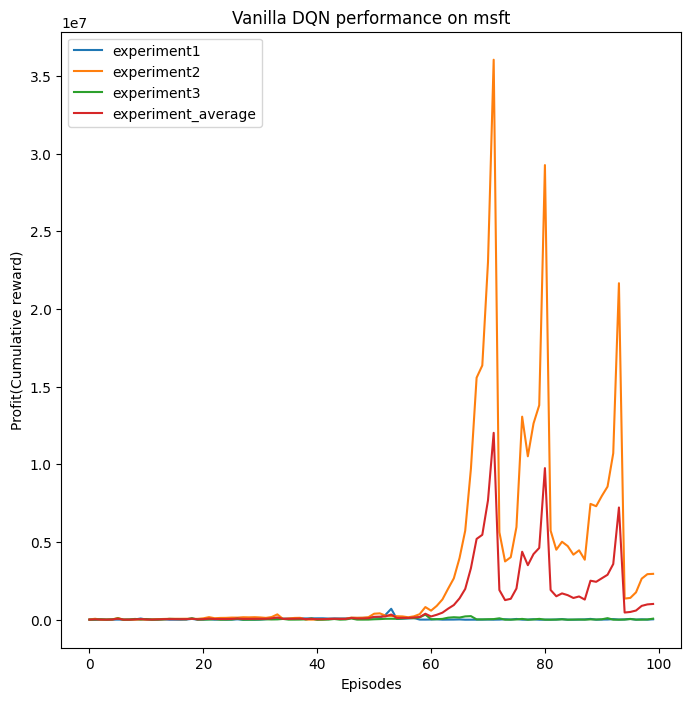

In [113]:
plt.figure(figsize=(8,8))
plt.plot(performance1[0], label= 'experiment1')
plt.plot(performance2[0], label= 'experiment2')
plt.plot(performance3[0], label= 'experiment3')
plt.plot(performance_vannilamsft[0], label= 'experiment_average')
plt.title('Vanilla DQN performance on msft')
plt.xlabel('Episodes')
plt.ylabel('Profit(Cumulative reward)')
plt.legend()
plt.show()

## Double Dueling DQN msft

In [89]:
env4 = StockTradingEnv(msft)
agent4 = DQNAgent2(env4, memory_size = 400, batch_size= 32, target_update= 100, epsilon_decay=1/200)
agent4.train(num_frames=1000, num_episode=100)
performance4 = pd.read_pickle("./dummy.pkl")

env5 = StockTradingEnv(msft)
agent5 = DQNAgent2(env5, memory_size = 400, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent5.train(num_frames=1000, num_episode=100)
performance5 = pd.read_pickle("./dummy.pkl")

env6 = StockTradingEnv(msft)
agent6 = DQNAgent2(env6, memory_size = 300, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent6.train(num_frames=1000, num_episode=100)
performance6 = pd.read_pickle("./dummy.pkl")

performance_doubleduelingmsft = (performance4+performance5+performance6) / 3


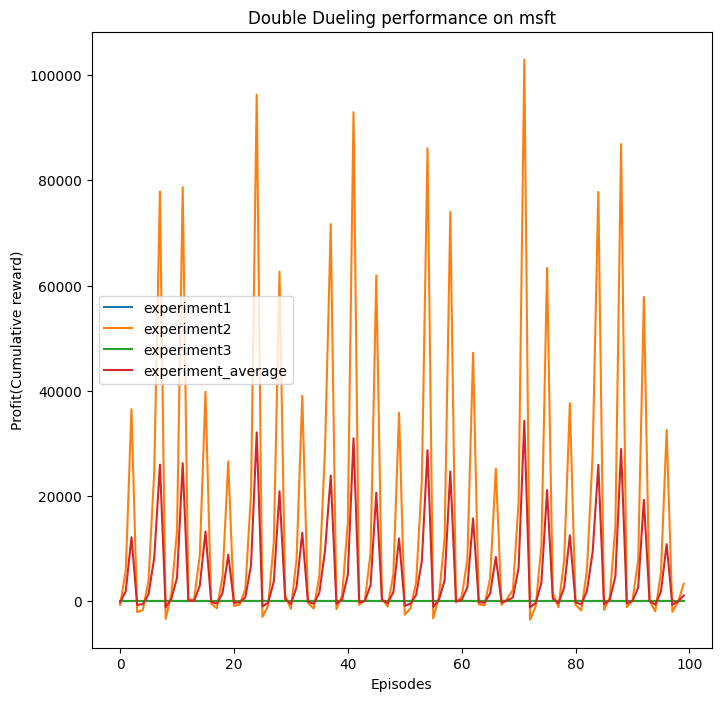

In [114]:
plt.figure(figsize=(8,8))
plt.plot(performance4[0], label= 'experiment4')
plt.plot(performance5[0], label= 'experiment5')
plt.plot(performance6[0], label= 'experiment6')
plt.plot(performance_doubleduelingmsft[0], label= 'experiment_average')
plt.title('Double Dueling DQN performance on msft')
plt.xlabel('Episodes')
plt.ylabel('Profit(Cumulative reward)')
plt.legend()
plt.show()

## Vanilla DQN amc

In [100]:
env7 = StockTradingEnv(amc)
agent7 = DQNAgent(env7, memory_size = 400, batch_size= 32, target_update= 100, epsilon_decay=1/200)
agent7.train(num_frames=1000, num_episode=100)
performance7 = pd.read_pickle("./dummy.pkl")

env8 = StockTradingEnv(amc)
agent8 = DQNAgent(env8, memory_size = 400, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent8.train(num_frames=1000, num_episode=100)
performance8 = pd.read_pickle("./dummy.pkl")

env9 = StockTradingEnv(amc)
agent9 = DQNAgent(env9, memory_size = 300, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent9.train(num_frames=1000, num_episode=100)
performance9 = pd.read_pickle("./dummy.pkl")

performance_vanillaamc = (performance7+performance8+performance9) / 3

-103356.18421328462
-288359.87378009607
-278585.47317385743
-178983.8292677267
-468466.09964857233
-749651.7563723109
-96045.93648305509
-67057.970499512
1819594.3059083612
-947923.6877023592
-57602.17048316639
-151091.71414601422
-88165.35254382202
-431296.6090938235
-517339.82148144103
93622.07695239253
13538561.751130236
-522113.460516251
-24843.770497972688
-105235.01422408815
5010629.95018052
-1427998.148720893
-138583.01100597778
653266.4384602082
-545111.97244183
-54129.730792846494
-172148.60038815247
-81482.5708194381
51705.711882583826
3114.345007658485
-143769.3891330304
-509278.6065716444
-727771.5801461078
-405062.92816678
-727945.6442974022
-404718.7567005566
-35435.110836989246
-229489.89092907452
-932761.6054105513
3728060.0301111233
-188849.27221300133
605010.8019825383
78027.99767526204
414972.8848181442
4527434.130600023
-68138.7417660392
-23209.497496657335
-123576.1108953072
-645301.9230679467
155720.67600346604
-167309.43792170088
-130272.43036845222
-23623.071124

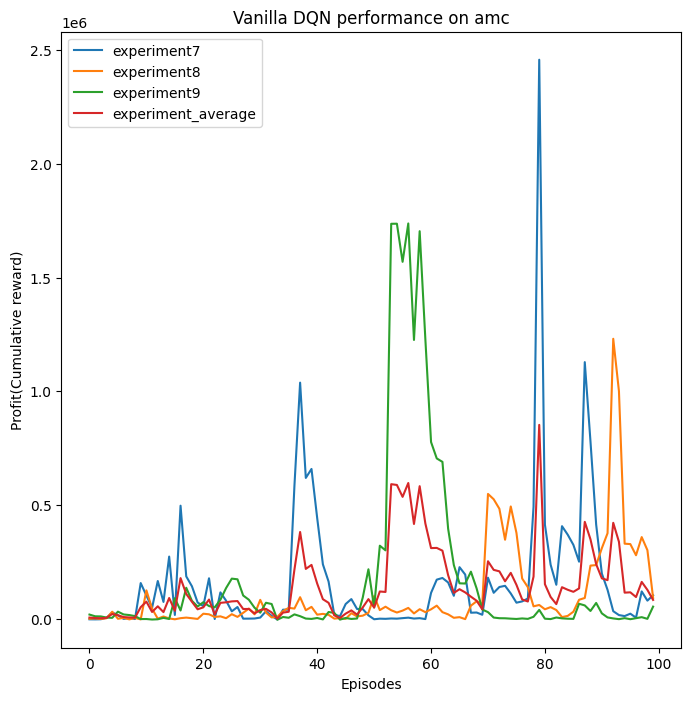

In [116]:
plt.figure(figsize=(8,8))
plt.plot(performance7[0], label= 'experiment7')
plt.plot(performance8[0], label= 'experiment8')
plt.plot(performance9[0], label= 'experiment9')
plt.plot(performance_vanillaamc[0], label= 'experiment_average')
plt.title('Vanilla DQN performance on amc')
plt.xlabel('Episodes')
plt.ylabel('Profit(Cumulative reward)')
plt.legend()
plt.show()

## Double Dueling DQN amc

In [102]:
env10 = StockTradingEnv(amc)
agent10 = DQNAgent2(env10, memory_size = 400, batch_size= 32, target_update= 100, epsilon_decay=1/200)
agent10.train(num_frames=1000, num_episode=100)
performance10 = pd.read_pickle("./dummy.pkl")

env11 = StockTradingEnv(amc)
agent11 = DQNAgent2(env11, memory_size = 400, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent11.train(num_frames=1000, num_episode=100)
performance11 = pd.read_pickle("./dummy.pkl")

env12 = StockTradingEnv(amc)
agent12 = DQNAgent2(env12, memory_size = 300, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent12.train(num_frames=1000, num_episode=100)
performance12 = pd.read_pickle("./dummy.pkl")

performance_doubleduelingamc = (performance10+performance11+performance12) / 3

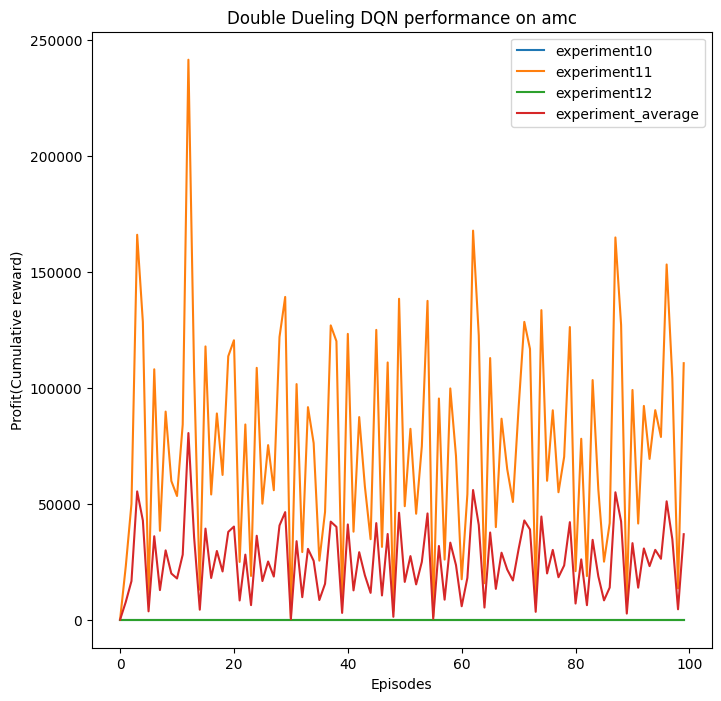

In [117]:
plt.figure(figsize=(8,8))
plt.plot(performance10[0], label= 'experiment10')
plt.plot(performance11[0], label= 'experiment11')
plt.plot(performance12[0], label= 'experiment12')
plt.plot(performance_doubleduelingamc[0], label= 'experiment_average')
plt.title('Double Dueling DQN performance on amc')
plt.xlabel('Episodes')
plt.ylabel('Profit(Cumulative reward)')
plt.legend()
plt.show()

## Vanilla DQN spy

In [103]:
env13 = StockTradingEnv(spy)
agent13 = DQNAgent(env13, memory_size = 400, batch_size= 32, target_update= 100, epsilon_decay=1/200)
agent13.train(num_frames=1000, num_episode=100)
performance13 = pd.read_pickle("./dummy.pkl")

env14 = StockTradingEnv(spy)
agent14 = DQNAgent(env14, memory_size = 400, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent14.train(num_frames=1000, num_episode=100)
performance14 = pd.read_pickle("./dummy.pkl")

env15 = StockTradingEnv(spy)
agent15 = DQNAgent(env15, memory_size = 300, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent15.train(num_frames=1000, num_episode=100)
performance15 = pd.read_pickle("./dummy.pkl")

performance_vanillaspy = (performance13+performance14+performance15) / 3

1157048.1177409983
2308002.574615104
-248932.53077147363
-265316.3129147449
700290.4936607868
164918.0959147047
-164368.4519246386
5667370.217157848
-137696.7439952733
-170406.9816864472
-536673.5211990483
-338077.8987362823
1036305.8355547534
-410755.12342520553
-289675.07530352625
113128.90075154876
4490233.529713473
-273411.5715512689
2078469.0098356355
92684.48255600895
-401838.4187574538
-262624.0982785913


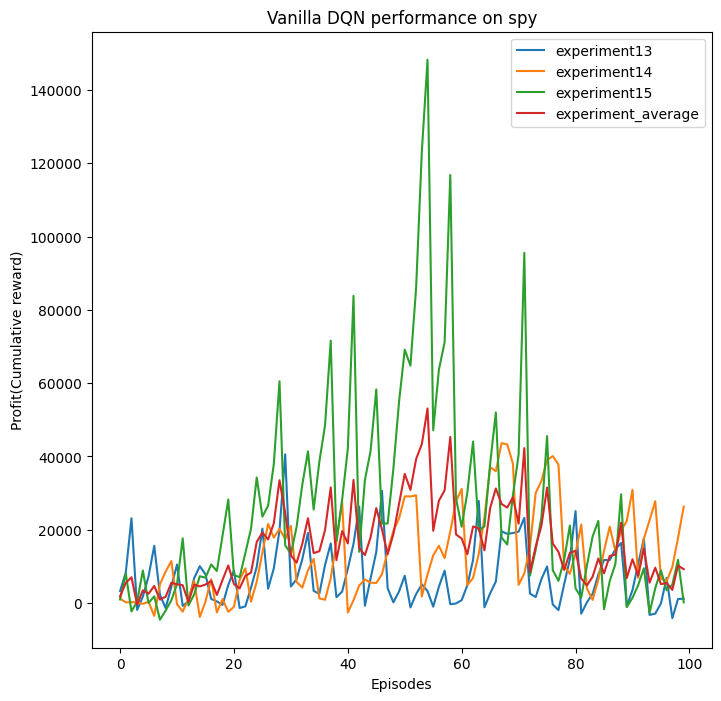

In [118]:
plt.figure(figsize=(8,8))
plt.plot(performance13[0], label= 'experiment13')
plt.plot(performance14[0], label= 'experiment14')
plt.plot(performance15[0], label= 'experiment15')
plt.plot(performance_vanillaspy[0], label= 'experiment_average')
plt.title('Vanilla DQN performance on spy')
plt.xlabel('Episodes')
plt.ylabel('Profit(Cumulative reward)')
plt.legend()
plt.show()

## Double Dueling DQN spy

In [104]:
env16 = StockTradingEnv(spy)
agent16 = DQNAgent2(env16, memory_size = 400, batch_size= 32, target_update= 100, epsilon_decay=1/200)
agent16.train(num_frames=1000, num_episode=100)
performance16 = pd.read_pickle("./dummy.pkl")

env17 = StockTradingEnv(spy)
agent17 = DQNAgent2(env17, memory_size = 400, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent17.train(num_frames=1000, num_episode=100)
performance17 = pd.read_pickle("./dummy.pkl")

env18 = StockTradingEnv(spy)
agent18 = DQNAgent2(env18, memory_size = 300, batch_size= 64, target_update= 100, epsilon_decay=1/200)
agent18.train(num_frames=1000, num_episode=100)
performance18 = pd.read_pickle("./dummy.pkl")

performance_doubleduelingspy = (performance16+performance17+performance18) / 3

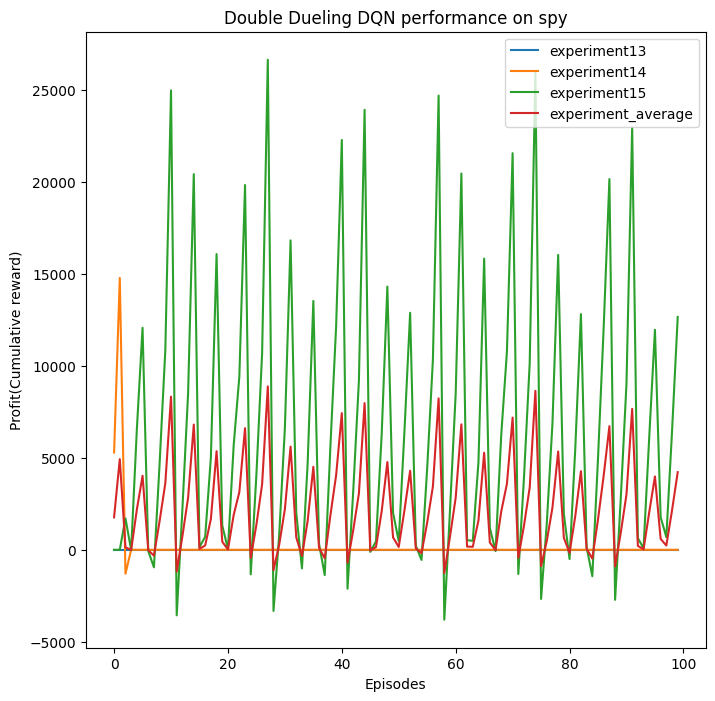

In [120]:
plt.figure(figsize=(8,8))
plt.plot(performance16[0], label= 'experiment13')
plt.plot(performance17[0], label= 'experiment14')
plt.plot(performance18[0], label= 'experiment15')
plt.plot(performance_doubleduelingspy[0], label= 'experiment_average')
plt.title('Double Dueling DQN performance on spy')
plt.xlabel('Episodes')
plt.ylabel('Profit(Cumulative reward)')
plt.legend()
plt.show()

## Summary

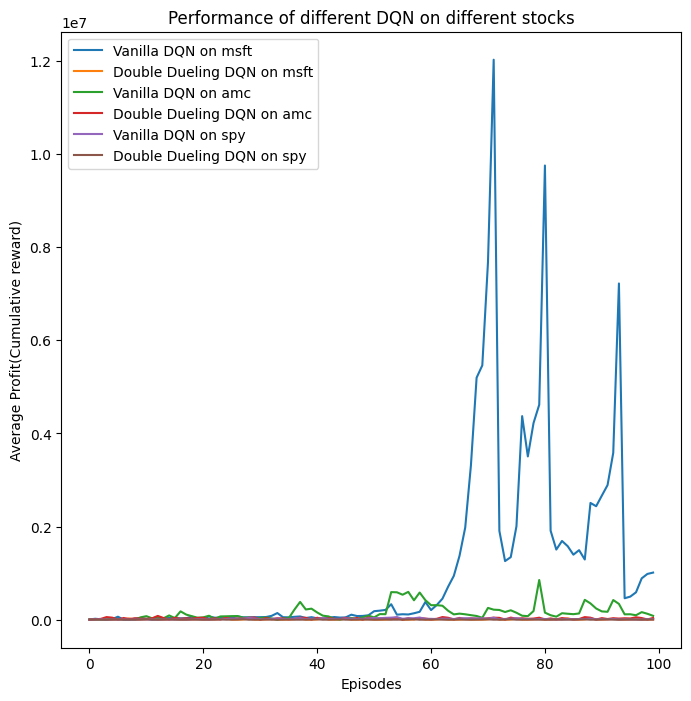

In [121]:
plt.figure(figsize=(8,8))
plt.plot(performance_vannilamsft[0], label= 'Vanilla DQN on msft')
plt.plot(performance_doubleduelingmsft[0], label= 'Double Dueling DQN on msft')
plt.plot(performance_vanillaamc[0], label= 'Vanilla DQN on amc')
plt.plot(performance_doubleduelingamc[0], label= 'Double Dueling DQN on amc')
plt.plot(performance_vanillaspy[0], label= 'Vanilla DQN on spy')
plt.plot(performance_doubleduelingspy[0], label= 'Double Dueling DQN on spy')

plt.title('Performance of different DQN on different stocks')
plt.xlabel('Episodes')
plt.ylabel('Average Profit(Cumulative reward)')
plt.legend()
plt.show()